In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import umap
import seaborn as sns

sns.set(style='white')

In [63]:
IN_DATA_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/dafx_latent_extraction"
FIG_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/dafx_classes"

In [64]:
emb = np.load(f"{IN_DATA_DIR}/emb_data.npy")
# pca = np.load(f"{IN_DATA_DIR}/pca_features.npy")
labels = np.load(f"{IN_DATA_DIR}/labels.npy")

In [65]:
with open(f'{IN_DATA_DIR}/label_mapping.pkl', 'rb') as handle:
    m = pickle.load(handle)

In [66]:
dafx_name_format = {
     'mda Ambience': 'Ambience',
     'mda Combo': 'Combo',
     'mda Delay': 'Delay',
     'mda Dynamics': 'Dynamics',
     'mda Overdrive': 'Overdrive',
     'mda RingMod': 'RingMod',
}

In [67]:
mapping = {v: dafx_name_format[k] for k, v in m.items()}

In [68]:
mapping

{0: 'Ambience',
 1: 'Combo',
 2: 'Delay',
 3: 'Dynamics',
 4: 'Overdrive',
 5: 'RingMod'}

In [69]:
print("Model embedding shape: ", emb.shape)
print("Label shape:", labels.shape)

Model embedding shape:  (6000, 128)
Label shape: (6000,)


In [70]:
umap_data = umap.UMAP(n_neighbors=50, min_dist=.3, metric='cosine').fit_transform(emb)

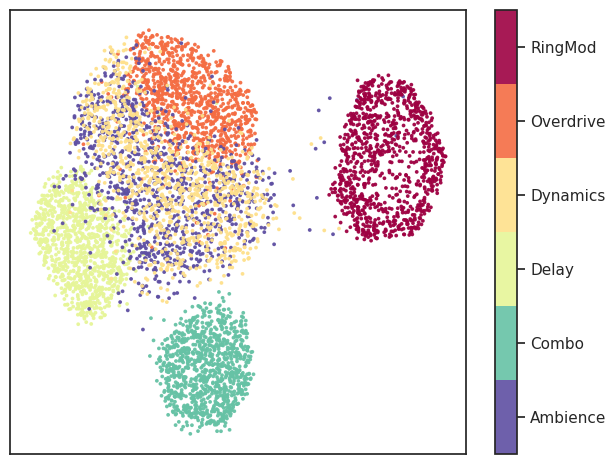

In [72]:
fig, ax = plt.subplots(1)

plt.scatter(*umap_data.T, s=3, c=labels, cmap='Spectral_r', alpha=.9)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(6+1)-0.5)
cbar.set_ticks(np.arange(6))
cbar.set_ticklabels([mapping[i] for i in cbar.get_ticks()])
# plt.title(f'Spectrogram VAE latent embeddings')
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/class_embeddings.png")